In [1]:
import pandas as pd
import numpy as np
import os as path
import matplotlib.pyplot as plt

In [2]:
# Change the working directory so i can access the dataset
path.chdir("C:/Users/elbaidoury/Documents/1-Projects/Sentiment-Analysis-Project/data")

In [3]:
#load the dataset
data = pd.read_csv("trainingdata.csv")

# Data understanding

In [4]:
data.shape

(1599999, 6)

In [5]:
data.head(3)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire


In [6]:
data.columns = ["sentiment", "time", "date", "query", "username", "text"]

In [7]:
data.head(1)

,sentiment,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...


In [8]:
data.tail(5)

,sentiment,time,date,query,username,text
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [9]:
# Checking the datatype, number of null values present
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1599999 non-null  int64 
 1   time       1599999 non-null  int64 
 2   date       1599999 non-null  object
 3   query      1599999 non-null  object
 4   username   1599999 non-null  object
 5   text       1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [10]:
data.isnull().sum()

sentiment    0
time         0
date         0
query        0
username     0
text         0
dtype: int64

No null values

In [11]:
data['sentiment'].value_counts()

4    800000
0    799999
Name: sentiment, dtype: int64

<AxesSubplot:>

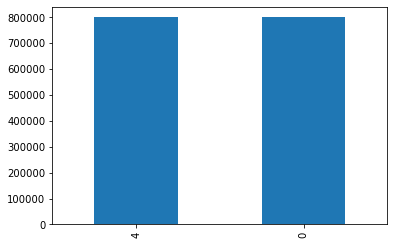

In [12]:
data['sentiment'].value_counts().plot.bar()

# Data Preparation

In [13]:
#let's create a new dataframe containing just the two relevant columns that we need

data = data[["sentiment", "text"]]
data.head()

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [14]:
# Converting the positive sentiment value from "4" to "1" in the target variable for better understanding

data["sentiment"] = data["sentiment"].apply(lambda x : 1 if x == 4 else x)
data.tail(5)

,sentiment,text
1599994,1,Just woke up. Having no school is the best fee...
1599995,1,TheWDB.com - Very cool to hear old Walt interv...
1599996,1,Are you ready for your MoJo Makeover? Ask me f...
1599997,1,Happy 38th Birthday to my boo of alll time!!! ...
1599998,1,happy #charitytuesday @theNSPCC @SparksCharity...


In [15]:
data["sentiment"].value_counts()

1    800000
0    799999
Name: sentiment, dtype: int64

In [16]:
text, sentiment = list(data["text"]), list(data["sentiment"])

In [17]:
print(text[0:6])
print("============================================")
print(sentiment[0:6])

["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds', 'my whole body feels itchy and like its on fire ', "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ", '@Kwesidei not the whole crew ', 'Need a hug ']
[0, 0, 0, 0, 0, 0]


# Data Preprocessing


**Text Preprocessing** is an important step for **Natural Language Processing (NLP)** tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better.

**The Preprocessing steps taken are:**
1. **Lower Casing:** Each text is converted to lowercase.
2. **Replacing URLs:** Links starting with **"http" or "https" or "www"** are replaced by **"URL"**.
3. **Replacing Emojis:** Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. *(eg: ":)" to "EMOJIsmile")*
4. **Replacing Usernames:** Replace @Usernames with word **"USER"**. 
5. **Removing Non-Alphabets:** Replacing characters except Alphabets with a space.
6. **Removing Consecutive letters:** 3 or more consecutive letters are replaced by 2 letters. *(eg: "Heyyyy" to "Heyy", "Niceee" to "Nice")*
7. **Removing Short Words:** Words with length less than 2 are removed.
8. **Removing Stopwords:** Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. *(eg: "the", "he", "have")*
9. **Lemmatizing:** Lemmatization is the process of converting a word to its base form. *(e.g: “Great” to “Good”)*

In [18]:
# function that will do all the work mentionned above

import string
import re
import time

def preprocess(textdata):
    
    # Defining dictionary containing all emojis with their meanings.
    emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
              ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
              ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
              ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
              '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
              '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
              ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

    stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
                 'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
                 'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
                 'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
                 'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
                 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
                 'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
                 'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
                 'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
                 's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
                 't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
                 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
                 'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
                 'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
                 'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
                 "youve", 'your', 'yours', 'yourself', 'yourselves']


    processedText = []
        
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    # alphaPattern      = "[^a-zA-Z0-9]"
    alphaPattern      = "[^a-zA-Z]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])    
            
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)  
        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        
        #Removing punctuations if any left post removing all all non alphabets
        all_char_list = []
        all_char_list = [char for char in tweet if char not in string.punctuation]
        tweet = ''.join(all_char_list)
        
        # Removing all stopwords as per custom list defined above
        tweetwords = ''
        for word in tweet.split():
            if word not in (stopwordlist):
                if len(word)>1:
                    # Lemmatizing the word.
                    # text_pos = pos_tag(word_tokenize(word))
                    # word = lemma.lemmatize(text_pos[0][0],get_wordnet_pos_tag(text_pos[0][1]))
                    # word = wordLemm.lemmatize(word)
                    tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [19]:
# apply the function to our text list
import time as t
t = t.time()
text = preprocess(text)
print('Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 145 seconds


In [20]:
# let's see the new text
print(text[:5])

['upset update facebook texting might cry result school today also blah ', 'USER dived many times ball managed save rest go bounds ', 'whole body feels itchy like fire ', 'USER no not behaving mad see over ', 'USER not whole crew ']


**We can clearly see the difference between the processing text comparing with the original one**

In [21]:
# Defining a method to return the 2nd parameter for lemmatization that is POS tag
def get_wordnet_pos_tag(tag):
    if tag.startswith("J"):
        return wordnet.ADJ
    if tag.startswith("V"):
        return wordnet.VERB
    if tag.startswith("N"):
        return wordnet.NOUN
    if tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN

### Lemmatization

**Lemmatisation** (or lemmatization) in linguistics is the process of grouping together the inflected **forms of a word** so they can be **analysed as a single item**, identified by the word's lemma, or dictionary form.

In [22]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [23]:
import nltk
from nltk.corpus import stopwords
from nltk import tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

In [24]:
# Created a method to perform lemmatization with POS tags identified via a pos_tag method
def lemmatize_process(text):
    # Create Lemmatizer
    lemma = WordNetLemmatizer()
    
    finalText = []
    for comment in text:
        text_pos = pos_tag(word_tokenize(comment))
        words = [x[0] for x in text_pos]
        pos = [x[1] for x in text_pos]
        comment_lemma = " ".join([lemma.lemmatize(a,get_wordnet_pos_tag(b)) for a,b in zip(words,pos)])
        finalText.append(comment_lemma)
    return finalText

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elbaidoury\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\elbaidoury\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elbaidoury\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
# Applying the entire text stored in list "text" for preprocessing and calculating the time taken to perform the operation
t2 = time.time()
text = lemmatize_process(text)
print('Text Lemmatization complete.')
print(f'Time Taken: {round(time.time()-t2)} seconds')

Text Lemmatization complete.
Time Taken: 3362 seconds


## Data Analysis

In [30]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [31]:
from wordcloud import WordCloud

#### Negative tweets Word Cloud

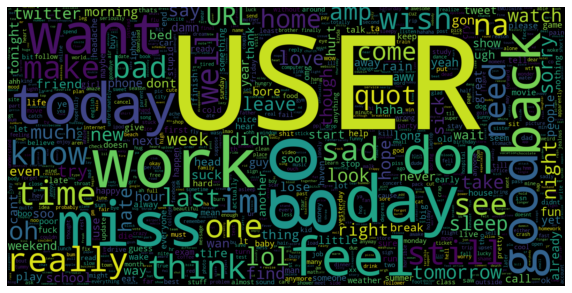

In [32]:
# Creating word cloud of negative tweets,
# the first 80000 tweets are negative

data_negatives = text[:800000]
all_negative_words = ' '.join(data_negatives)
wordcloud = WordCloud(max_words = 1000, width= 1600, height= 800,
                      collocations = False).generate(all_negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Positive tweets Word Cloud

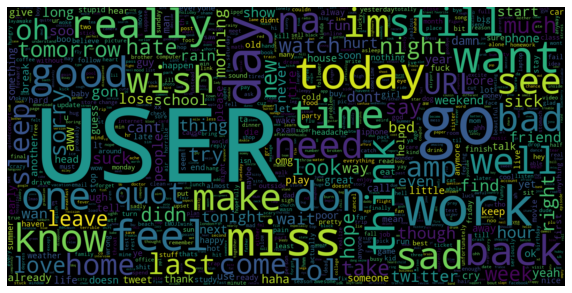

In [33]:
# Creating word cloud of positive tweets

data_positive = text[800000:]
all_positive_words = ' '.join(data_negatives)
wordcloud = WordCloud(max_words = 1000, width= 1600, height= 800,
                      collocations = False).generate(all_positive_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Frequent word identification

In [34]:
import seaborn as sns

In [35]:
#identify the most frequent set of words in the datset segregated by target variable

token_wspace = tokenize.WhitespaceTokenizer()

def mostFrequentWords(tweets,quantity):
    all_words = ' '.join(tweets)
    all_tokens = token_wspace.tokenize(all_words)
    freq_dist = nltk.FreqDist(all_tokens)
    df_frequency = pd.DataFrame({"Word":list(freq_dist.keys()), "Frequency":list(freq_dist.values())})
    df_frequency = df_frequency.nlargest(columns="Frequency", n=quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

#### Negative frequent word

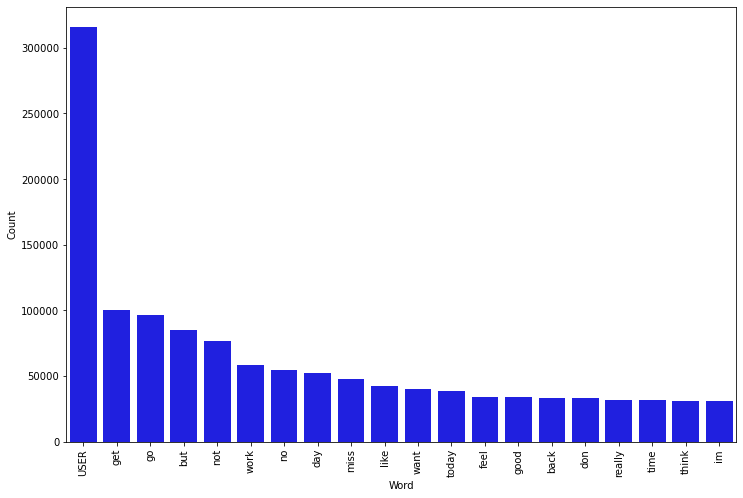

In [36]:
# Calling the above method for negative cases, plotting the most frequent top 10 words
mostFrequentWords(text[:800000],20)

#### Positive frequent word

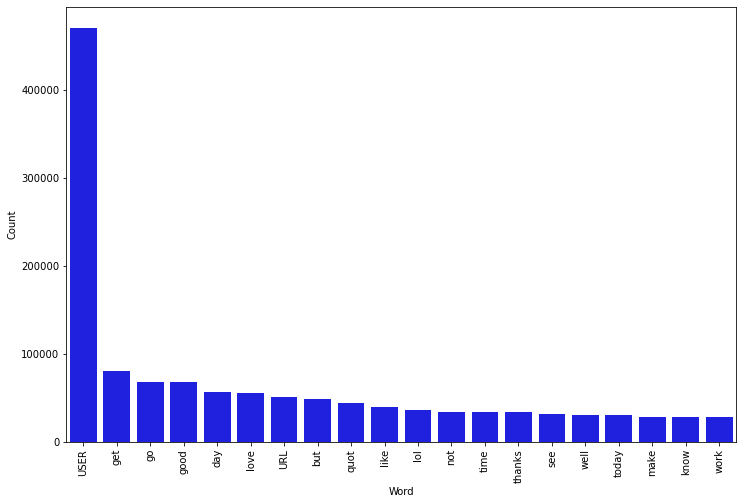

In [37]:
mostFrequentWords(text[800000:],20)

## <a name="p7">Splitting the Data</a>

In [38]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold

In [39]:
# Splitting the entire set into train and test with test size of 5%
X_train, X_test, y_train, y_test = train_test_split(text, sentiment,
                                                    test_size = 0.05, random_state = 0)
print('Splitting the data is done.')

Splitting the data is done.


## <a name="p8">TF-IDF Vectoriser</a>

**TF-IDF indicates the importance of a word, in order to understand the document or dataset.** Let us understand with an example. Suppose you have a dataset where students write an essay on the topic, My Bike. In this dataset, the bike word appears many times; it’s a high frequency word compared to other words in the dataset. The dataset contains other words like street, long ride, helmets and so on that appear less often, so their frequency are lower and they carry more information compared to the word. This is the intuition behind TF-IDF.

**TF-IDF Vectoriser** converts a collection of raw documents to a **matrix of TF-IDF features**. The **Vectoriser** is usually trained on only the **train** dataset. 

**ngram_range**  is the range of number of words in a sequence. *[e.g "very expensive" is a 2-gram that is considered as an extra feature separately from "very" and "expensive" when you have a n-gram range of (1,2)]*

**max_features** specifies the number of features to consider. *[Ordered by feature frequency across the corpus]*.

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer

#### fitting the TFIDF vectorizer

In [41]:
# Fitting TFIDF vectorizer using the train dataset
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  500000


#### Tranforming the dataset

In [42]:
# Transforming the X_train and X_test dataset on the fitted model
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


## <a name="p10">Creating and Evaluating Models</a>

We're creating 3 different types of model for our sentiment analysis problem: 
* **Linear Support Vector Classification (LinearSVC)**
* **Bernoulli Naive Bayes (BernoulliNB)**
* **Logistic Regression (LR)**

Since our dataset is not **skewed**, i.e. it has equal number of **Positive and Negative** Predictions. We're choosing **Accuracy** as our evaluation metric. Furthermore, we're plotting the **Confusion Matrix** and **ROC Curve** to get an understanding of how our model is performing on both classification types.

In [46]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,recall_score,precision_score,classification_report,roc_curve, auc

In [47]:
# Creating a method which will take the model object and then predict on the test set and evaluate on Accuracy, 
# Confusion Matrix and ROC Curve

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Negative','False Positive', 'False Negative','True Positive']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    
    
    plt.title ("ROC Curve")
    #Area under Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()
    
    return y_pred

### <a name="p10-1">LinearSVC Model</a>

In [48]:
from sklearn import svm
from sklearn.svm import LinearSVC

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     39986
           1       0.79      0.81      0.80     40014

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



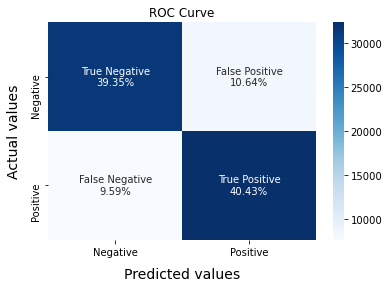

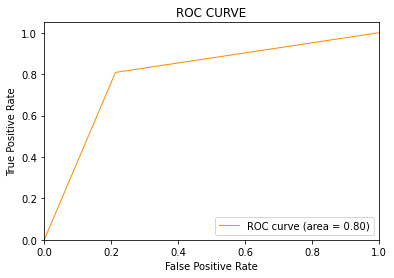

array([1, 1, 0, ..., 0, 1, 1])

In [49]:
# Created a Linear SVM model with default parameters and then evaluating the model

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

### <a name="p10-2">BernoulliNB Model</a>

In [50]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     39986
           1       0.79      0.80      0.80     40014

    accuracy                           0.79     80000
   macro avg       0.79      0.79      0.79     80000
weighted avg       0.79      0.79      0.79     80000



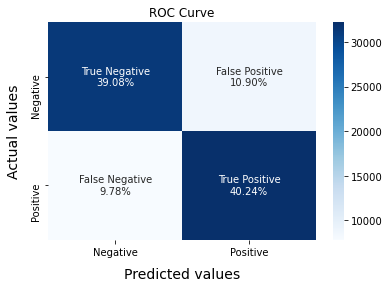

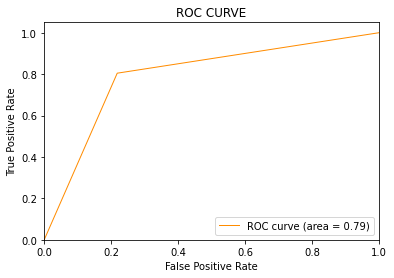

array([1, 1, 0, ..., 0, 1, 0])

In [51]:
# Created a Bernoulli Naive Bayes model with default parameters and then evaluating the model

BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

### <a name="p10-3">Logistic Regression Model</a>

In [52]:
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

           0       0.82      0.80      0.81     39986
           1       0.81      0.82      0.81     40014

    accuracy                           0.81     80000
   macro avg       0.81      0.81      0.81     80000
weighted avg       0.81      0.81      0.81     80000



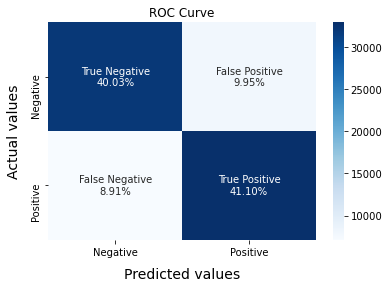

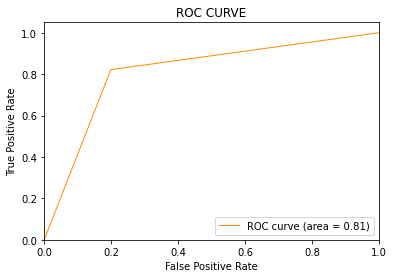

In [53]:
# Created a Logistic Regression model with regularization parameter and max iteration limit and then evaluating the model
LRmodel = LogisticRegression(C = 1, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
y_test_pred = model_Evaluate(LRmodel)

We can clearly see that the **Logistic Regression Model** performs better than the other models that we tried. It achieves nearly **81% accuracy** while classifying the sentiment of a tweet.

However it should also be noted that the **BernoulliNB Model** is the fastest to train and predict on. It also achieves **79% accuracy** while calssifying.

As we need the prediction probabilities hence not proceeding with the SVM Model 

### Test data based on logistic regression model

In [54]:
# Printing the positive and negative sentiment on the test data based on logistic regression model
print("Positive Sentiment Percentage : {}%".format(round(np.count_nonzero(y_test_pred == 1)/len(y_test_pred)*100,2)))

print("Negative Sentiment Percentage : {}%".format(round(np.count_nonzero(y_test_pred == 0)/len(y_test_pred)*100,2)))

Positive Sentiment Percentage : 51.05%
Negative Sentiment Percentage : 48.95%


## <a name="p11">Saving the Model</a>
We're using **PICKLE** to save **Vectoriser and Logistic Regression Model** for later use.

In [88]:
import pickle

In [89]:
# Storing the vectorizer object and Logistic Regression object in pickle files for later use

file = open('../models/vectoriser.pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('../models/Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

## <a name="p12">Using the Model</a>

To use the model for **Sentiment Prediction** we need to import the **Vectoriser** and **LR Model** using **Pickle**.

The vectoriser can be used to transform data to matrix of TF-IDF Features.
While the model can be used to predict the sentiment of the transformed Data.
The text whose sentiment has to be predicted however must be preprocessed.

In [90]:
# Created a method to load the models from pickle file
def load_models():  
       
    # Load the vectoriser.
    file = open('../models/vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    
    # Load the LR Model.
    file = open('../models/Sentiment-LR.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel


# Created a method to perform tfidf vectorizer on unseen data and then using the model loaded from pickle file to predict 
# whether positive or negative and also the probability along with it.
# Do note the unseen data should be passed to the model in a list
def predict(vectoriser, model, text):
    finaldata = []

    textdata = vectoriser.transform(lemmatize_process(preprocess(text)))
    sentiment = model.predict(textdata)
    
    # print(model.classes_)
    sentiment_prob = model.predict_proba(textdata)
    
    for index,tweet in enumerate(text):
        if sentiment[index] == 1:
            sentiment_probFinal = sentiment_prob[index][1]
        else:
            sentiment_probFinal = sentiment_prob[index][0]
            
        sentiment_probFinal2 = "{}%".format(round(sentiment_probFinal*100,2))
        finaldata.append((tweet, sentiment[index], sentiment_probFinal2))
           
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(finaldata, columns = ['tweet','sentiment', 'Probability(Confidence Level)'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [91]:
# Text to classify should be in a list.
text_Classifier =  ["I hate twitter",
                    "I do not like the movie",
                    "Mr. Stark, I don't feel so good",
                    "May the Force be with you.",
                    "I read the book, the content is not good",
                    "This is a new beginning for us"]

In [92]:
# Calling the load model method and then calling predict method by passing the tfidf vectorizer and model as parameter
# Finally printing the dataframe containing tweet, sentiment and the probability confidence.
vectoriser, LRmodel = load_models()
df = predict(vectoriser, LRmodel, text_Classifier)
df

,tweet,sentiment,Probability(Confidence Level)
0,I hate twitter,Negative,93.17%
1,I do not like the movie,Negative,80.54%
2,"Mr. Stark, I don't feel so good",Negative,68.68%
3,May the Force be with you.,Positive,66.8%
4,"I read the book, the content is not good",Negative,67.11%
5,This is a new beginning for us,Positive,79.9%


## <a name="p13">Using the Model - Excel Upload</a>

**The objective** of the below analysis is to **identify and priotize important tweets in alarming situation**, say a storm like Hurricane where the tweets **(negative tweets)** which needs attention by authorities are shown first.

In [93]:
# Importing the dataset
data = pd.read_csv("testdata.csv", encoding = "ISO-8859-1")
data.head()

,url,date,text
0,https://twitter.com/EcoLisa_/status/9022754290...,Mon Aug 28 21:03:20 2017,Here's how you can help victims of #HurricaneH...
1,https://twitter.com/RedefiningDecor/status/903...,Thu Aug 31 15:43:15 2017,RT @tripgabriel: This is a very gripping graph...
2,https://twitter.com/BestofY00/status/903281998...,Thu Aug 31 15:43:05 2017,RT @tripgabriel: This is a very gripping graph...
3,https://twitter.com/Deborah9111966/status/9032...,Thu Aug 31 15:43:01 2017,RT @tripgabriel: This is a very gripping graph...
4,https://twitter.com/kirkbocchi/status/90328194...,Thu Aug 31 15:42:53 2017,RT @tripgabriel: This is a very gripping graph...


In [94]:
data.shape

(15428, 3)

In [95]:
# Storing text and sentiment data in lists for further processing
text = list(data['text'])

In [96]:
text[:4]

["Here's how you can help victims of #HurricaneHarvey https://t.co/1Hg5uMbgbP #HarveyFlood #HoustonStrong #RockportStrong #texas #hurricane",
 'RT @tripgabriel: This is a very gripping graphic: Thousands Cried for Help as Houston Flooded https://t.co/CJD31y6sFH',
 'RT @tripgabriel: This is a very gripping graphic: Thousands Cried for Help as Houston Flooded https://t.co/CJD31y6sFH',
 'RT @tripgabriel: This is a very gripping graphic: Thousands Cried for Help as Houston Flooded https://t.co/CJD31y6sFH']

In [97]:
# Created a method to perform tfidf vectorizer on unseen data and then using the model loaded from pickle file to predict 
# whether positive or negative and also the probability along with it.
# Do note the unseen data should be passed to the model in a list
def predict_Excel(vectoriser, model, text):
    finaldata = []

    textdata = vectoriser.transform(lemmatize_process(preprocess(text)))
    sentiment = model.predict(textdata)
    
    # print(model.classes_)
    sentiment_prob = model.predict_proba(textdata)
    
    for index,tweet in enumerate(text):
        sentiment_probFinal = sentiment_prob[index][0]
            
        sentiment_probFinal2 = "{}%".format(round(sentiment_probFinal*100,2))
        finaldata.append((tweet, sentiment[index], sentiment_probFinal2))
           
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(finaldata, columns = ['tweet','sentiment', 'Severity'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [98]:
vectoriser, LRmodel = load_models()
df = predict_Excel(vectoriser, LRmodel, text)

In [99]:
df.sort_values(by=['Severity'],ascending=False,inplace=True)
df

,tweet,sentiment,Severity
6888,When the storm comes it affects us all...no ex...,Negative,99.61%
2009,This breaks my heart. I wish I could do more t...,Negative,99.52%
18,This is so sad. Thousands Cried for Help as Ho...,Negative,99.3%
9121,It's Sad That Some Hispanics In Houston Have T...,Negative,99.19%
9794,Sad and scary situation in Houston https://t.c...,Negative,99.12%
...,...,...,...
9515,RT @PRyan: Thank you @JJWatt. You make Wiscons...,Positive,0.98%
9514,RT @PRyan: Thank you @JJWatt. You make Wiscons...,Positive,0.98%
9506,RT @PRyan: Thank you @JJWatt. You make Wiscons...,Positive,0.98%
1477,Good morning #SPNFamily I'm so proud of us Ke...,Positive,0.92%


<ipython-input-100-cc295dc7485d>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


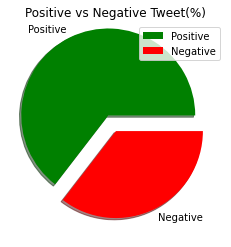

In [100]:
positive = round(np.count_nonzero(df['sentiment'] == "Positive")/len(df['sentiment'])*100,2)
negative = round(np.count_nonzero(df['sentiment'] == "Negative")/len(df['sentiment'])*100,2)

labels = ['Positive','Negative']
values = np.array([positive,negative])
myexplode = [0.2, 0]
mycolors = ["green", "red"]

fig,ax = plt.subplots()
ax.pie(values, labels = labels, explode = myexplode, shadow = True, colors = mycolors)
ax.legend()
ax.set_title("Positive vs Negative Tweet(%)")
fig.show()

In [104]:
path.chdir("C:/Users/elbaidoury/Documents/1-Projects/Sentiment-Analysis-Project")

In [105]:
filename = 'Prediction_file.csv'
df.to_csv(filename, index=False)
print('Saved file: ' + filename)

Saved file: Prediction_file.csv
